
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [121]:
df = pd.read_csv(r"C:\Users\HP\Desktop\HR-EmployeeAttrition.csv",engine='python')

In [122]:
df.head()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [123]:
df.shape

(1470, 35)

In [124]:
df_pd = pd.DataFrame(df)
df_pd.rename(columns ={'ï»¿Age':'Age'},inplace=True)

In [125]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [126]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Features and Targets:
   <b>INPUT FEATURES</b>:
                   
                   'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
                   'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
                   'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
                   'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
                   'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
                   'OverTime', 'PercentSalaryHike', 'PerformanceRating',
                   'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                   'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                   'YearsWithCurrManager'
                   
   <b>TARGET FEATURE</b>: 
                   
                   'Attrition'-Attrition in human resources refers to the gradual loss of employees over time.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

only few  datatypes are object 

In [128]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Target Variable `Attrition` is a binary target.Need to perform classification on this dataset.

In [129]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

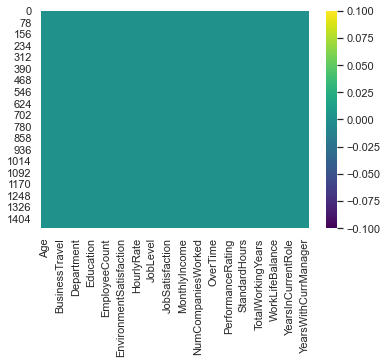

In [130]:
sns.heatmap(df.isna(),cmap='viridis')

we can see that there are no null values

In [131]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


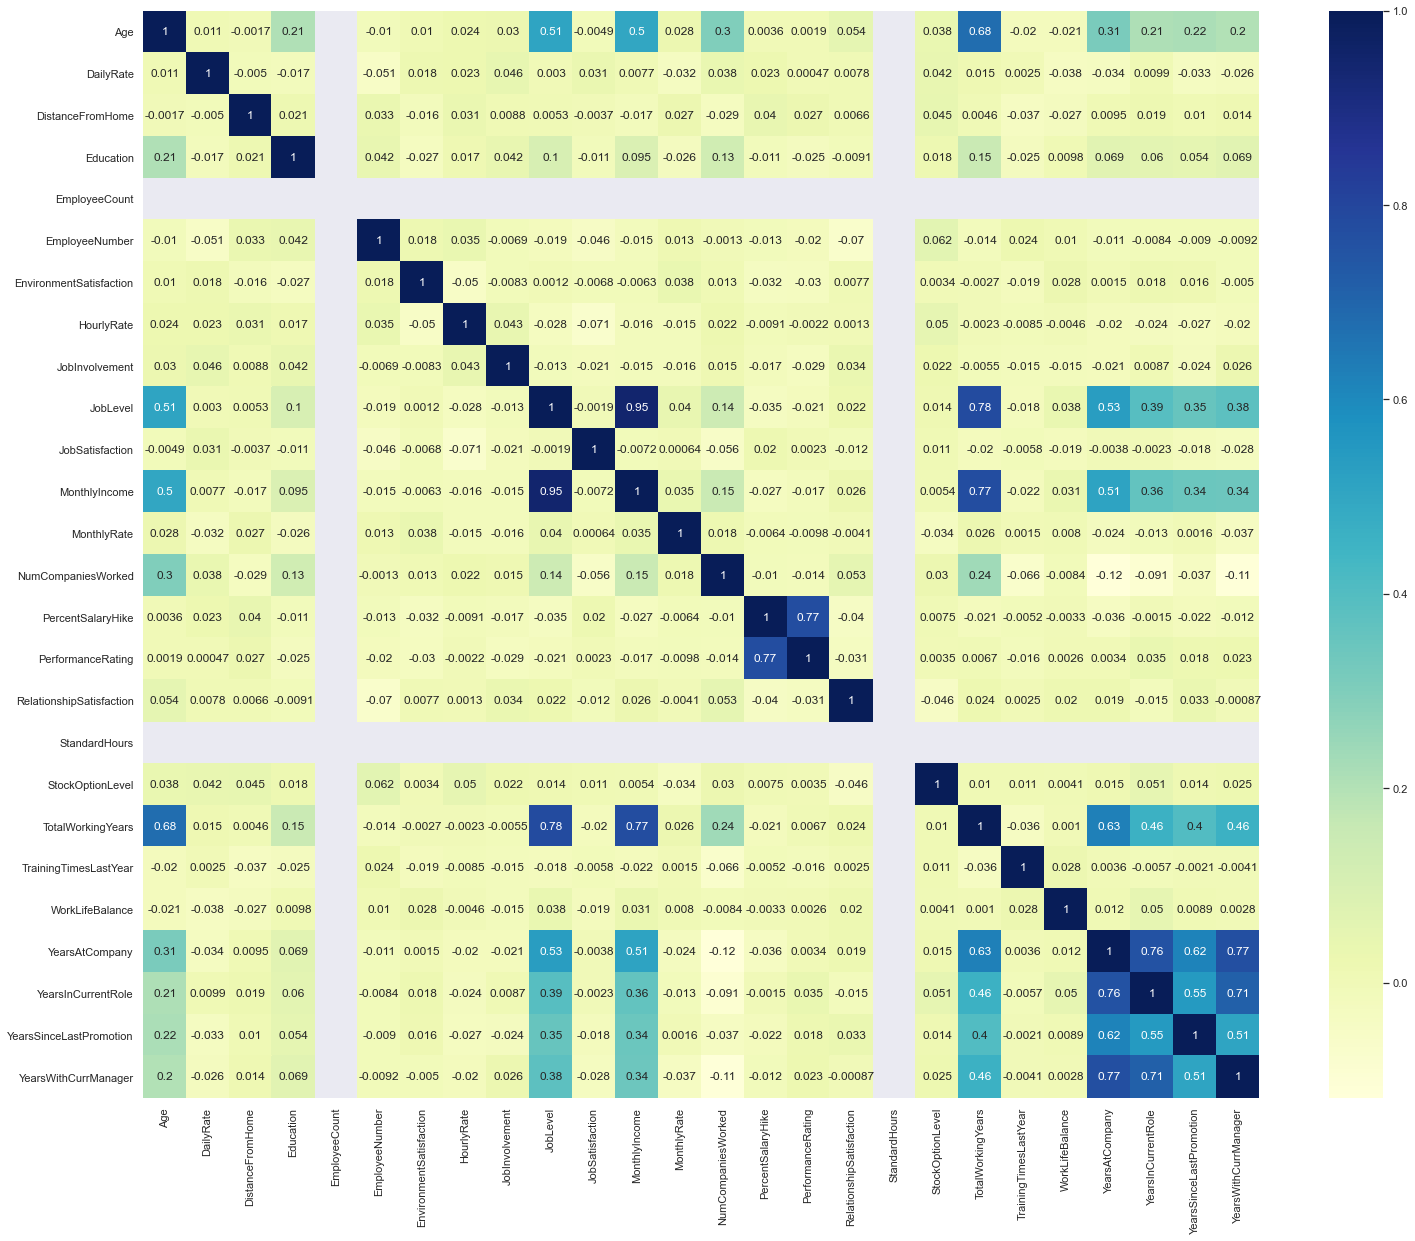

In [132]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

features monthly incore and job level are highly correlated
and also numbers of years in company are also related

LETS START WITH EDA-



'Age'

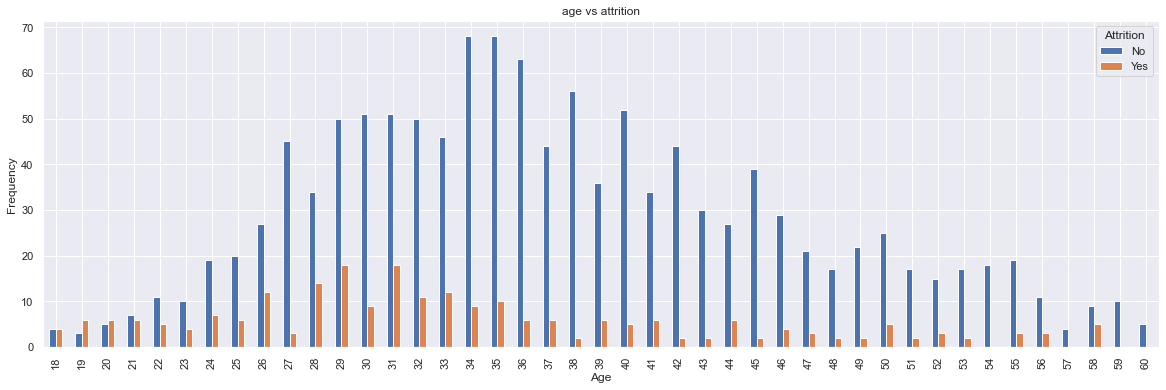

In [133]:
pd.crosstab(df.Age,df.Attrition).plot(kind="bar",figsize=(20,6))
plt.title('age vs attrition')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

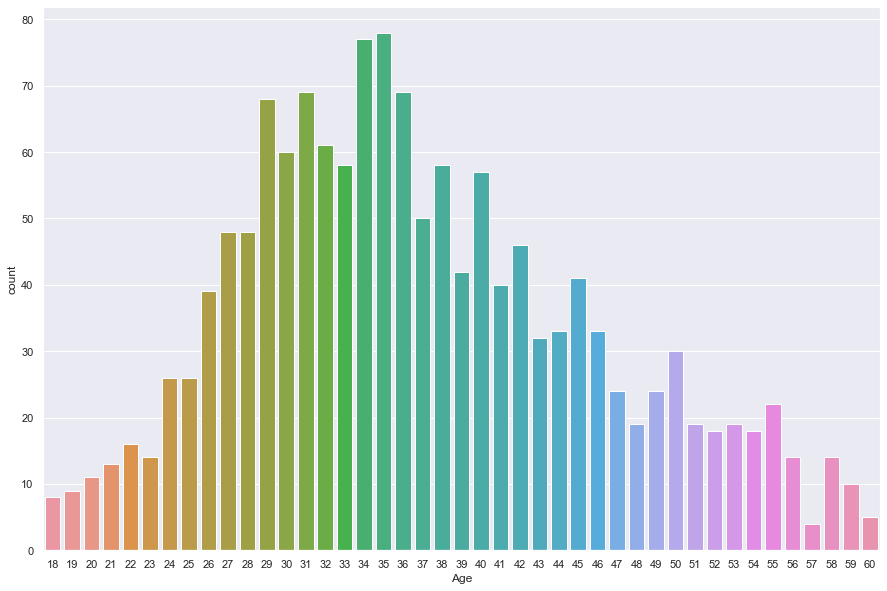

In [134]:
plt.figure(figsize=(15,10))
sns.countplot(df.Age)

Most of the employess in the company are from the age group of 26 to 38
The minumum age required to work in the company is 18yrs.
maximum is 60 yrs of age

'Business Travel'

In [135]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

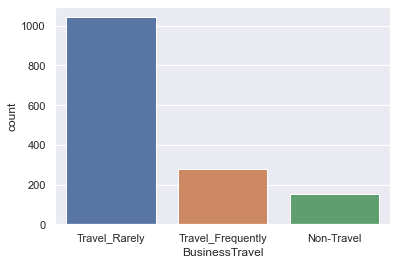

In [136]:
sns.set_theme(style="darkgrid")
ax=sns.countplot(x="BusinessTravel", data=df)

In [137]:
countNonTravel  = len(df[df.BusinessTravel == 'Non-Travel' ])
countTravelRarely  = len(df[df.BusinessTravel == 'Travel_Rarely'])
countTravelFrequently = len(df[df.BusinessTravel == 'Travel_Frequently'])
print("Percentage of countNon-Travel: {:.2f}%".format((countNonTravel / (len(df.BusinessTravel))*100)))
print("Percentage of Travel_Rarely : {:.2f}%".format((countTravelRarely/ (len(df.BusinessTravel))*100)))
print("Percentage of Travel_Frequently : {:.2f}%".format((countTravelFrequently / (len(df.BusinessTravel))*100)))

Percentage of countNon-Travel: 10.20%
Percentage of Travel_Rarely : 70.95%
Percentage of Travel_Frequently : 18.84%


Most of the perople in the company travel rarely but there are very few non travellers.

Daily rate

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

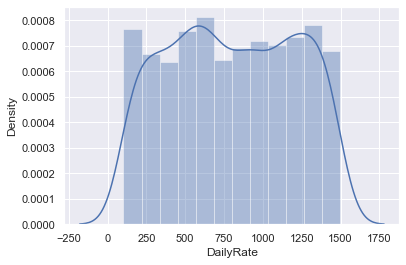

In [138]:
sns.distplot(df.DailyRate)

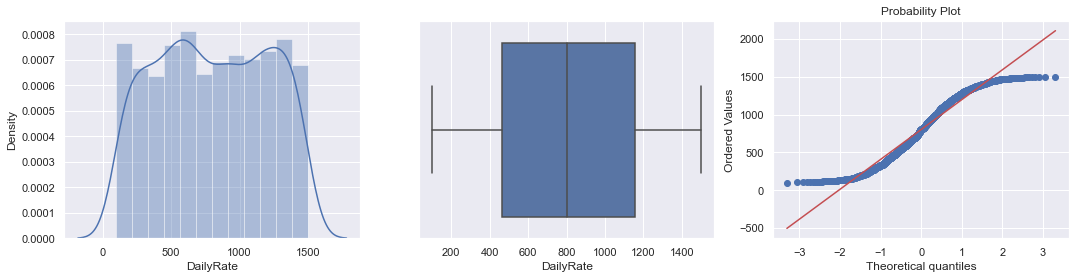

In [139]:
import seaborn as sns
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
sns.distplot(df.DailyRate, ax=ax[0])
sns.boxplot(df.DailyRate, ax=ax[1])
from scipy import stats
stats.probplot(df['DailyRate'], plot=ax[2])
plt.show()

from above graphs we can conclude that daily rate per person is between 100-1500

'Department'

In [140]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

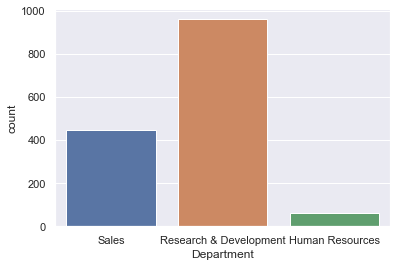

In [141]:
sns.set_theme(style="darkgrid")
ax=sns.countplot(x="Department", data=df)

In [142]:
countsales  = len(df[df.Department == 'Sales' ])
countrnd  = len(df[df.Department == 'Research & Development'])
counthr = len(df[df.Department == 'Human Resources'])
print("Percentage of countsales: {:.2f}%".format((countsales/ (len(df.Department))*100)))
print("Percentage of countrnd : {:.2f}%".format((countrnd/ (len(df.Department))*100)))
print("Percentage of counthr : {:.2f}%".format((counthr / (len(df.Department))*100)))

Percentage of countsales: 30.34%
Percentage of countrnd : 65.37%
Percentage of counthr : 4.29%


65% are in research and development
human resource has only 4.2%

'Distance From Home'

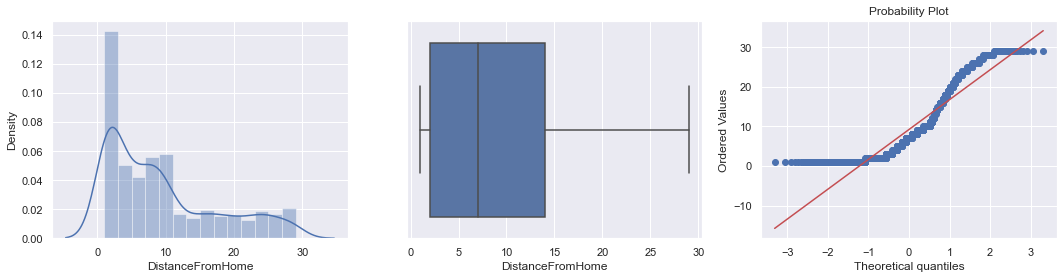

In [143]:
import seaborn as sns
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
sns.distplot(df.DistanceFromHome, ax=ax[0])
sns.boxplot(df.DistanceFromHome, ax=ax[1])
from scipy import stats
stats.probplot(df['DistanceFromHome'], plot=ax[2])
plt.show()

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

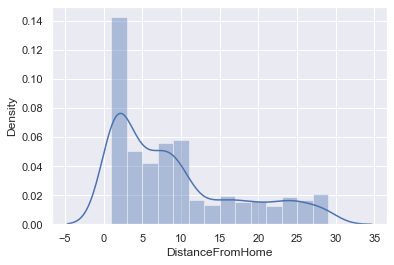

In [144]:
sns.distplot(df.DistanceFromHome)

Most people look forward to live near by office to reduce expense.

'Education field'

In [145]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

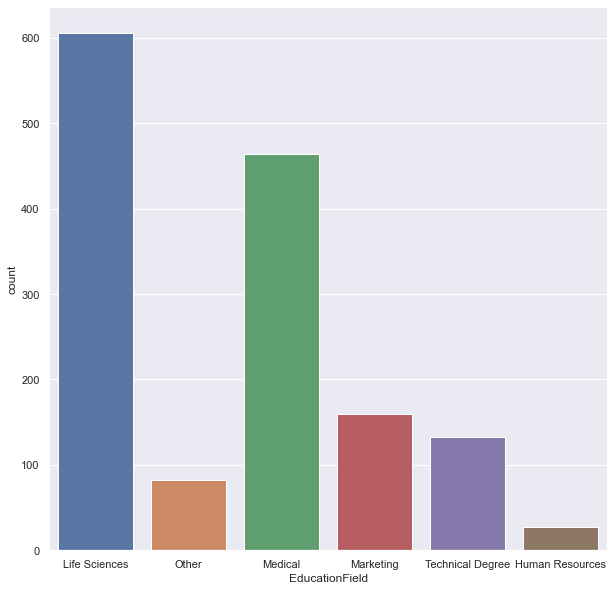

In [146]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax=sns.countplot(x="EducationField", data=df)

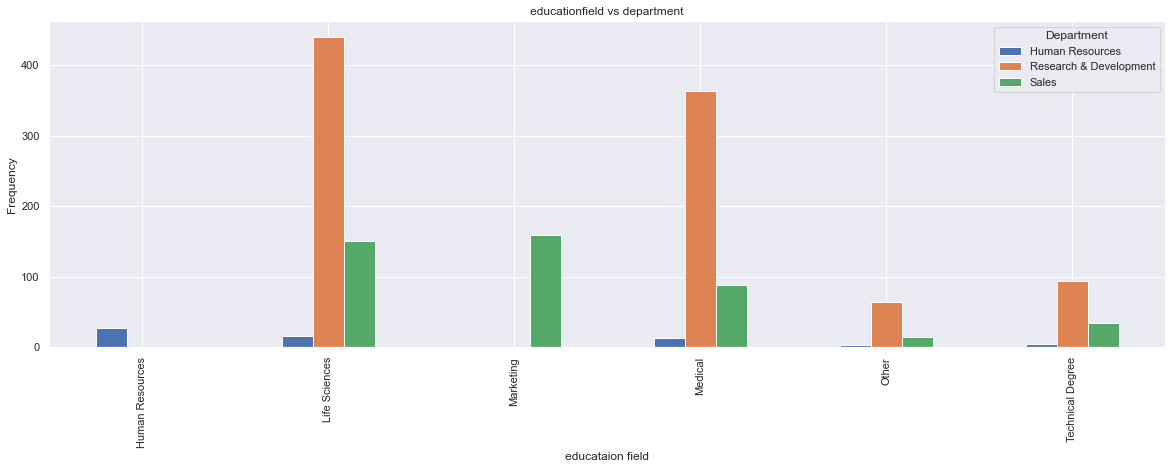

In [147]:
pd.crosstab(df.EducationField,df.Department).plot(kind="bar",figsize=(20,6))
plt.title('educationfield vs department')
plt.xlabel('educataion field')
plt.ylabel('Frequency')
plt.show()

most people are from life science and 
as per department wise  research and marketing percentage is high but not in field of human resource and marketing.

'Education'

In [148]:
df.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

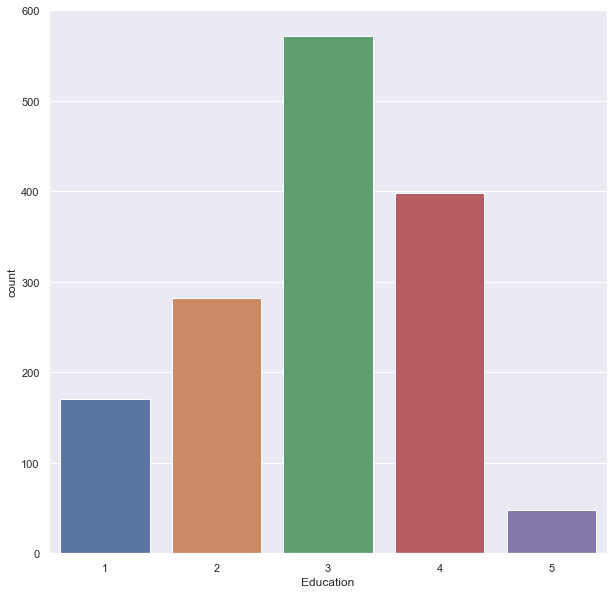

In [149]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax=sns.countplot(x="Education", data=df)

In [150]:
count1 = len(df[df.Education == 1])
count2 = len(df[df.Education == 2])
count3 = len(df[df.Education == 3])
count4 = len(df[df.Education == 4])
count5 = len(df[df.Education == 5])
print("Percentage of count1: {:.2f}%".format((count1 / (len(df.Education))*100)))
print("Percentage of count2: {:.2f}%".format((count2/ (len(df.Education))*100)))
print("Percentage of count3: {:.2f}%".format((count3 / (len(df.Education))*100)))
print("Percentage of count4: {:.2f}%".format((count4 / (len(df.Education))*100)))
print("Percentage of count5: {:.2f}%".format((count5 / (len(df.Education))*100)))


Percentage of count1: 11.56%
Percentage of count2: 19.18%
Percentage of count3: 38.91%
Percentage of count4: 27.07%
Percentage of count5: 3.27%


almost 56 percent have education leve 3-4 and only 3 percent people only have hightest level of education.

'Relation Satisfaction Level'

In [151]:
df.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

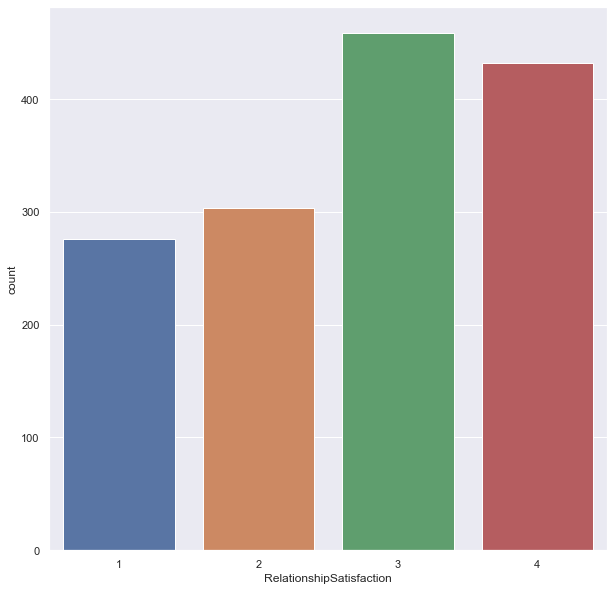

In [152]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax=sns.countplot(x="RelationshipSatisfaction", data=df)

this column look normally distriburted

'Stockoptionlevel'

In [153]:
df.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

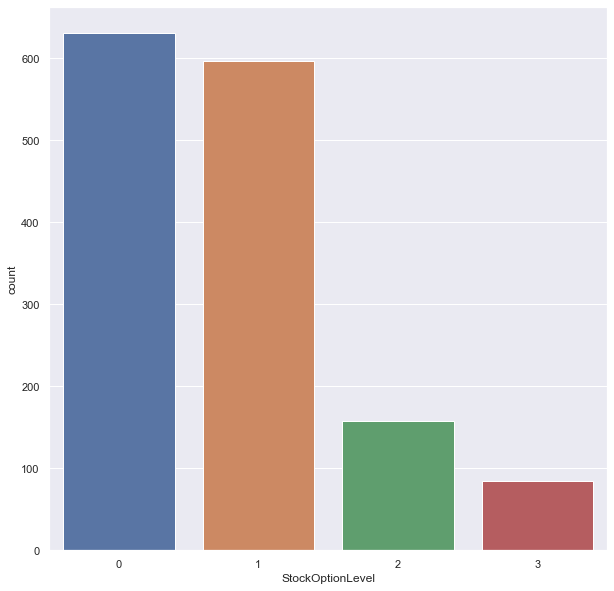

In [154]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax=sns.countplot(x="StockOptionLevel", data=df)

it looks normally via graph

'total working years'

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

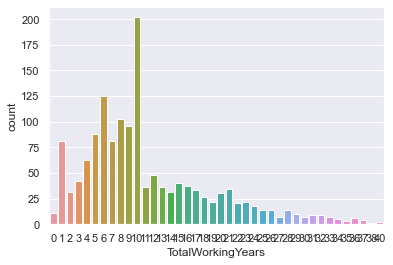

In [155]:

sns.countplot(df.TotalWorkingYears)

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

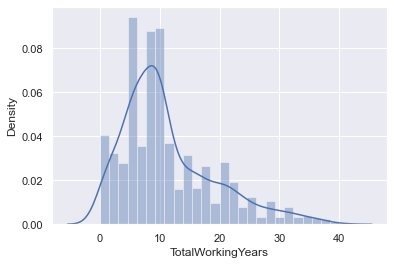

In [156]:
sns.distplot(df.TotalWorkingYears)

its positively skewed and most people work over 10 years

'Gender'

In [157]:
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

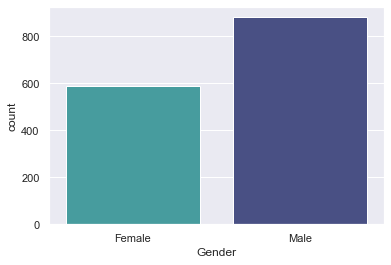

In [158]:
sns.countplot(x='Gender', data=df, palette="mako_r")
plt.show()

male are comparatively greater than females in company

'Hourly rate'

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

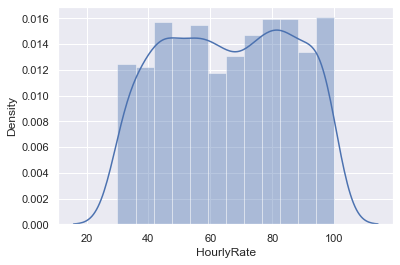

In [159]:
sns.distplot(df.HourlyRate)

The hourly rate is uniform

'Job Role'

In [160]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

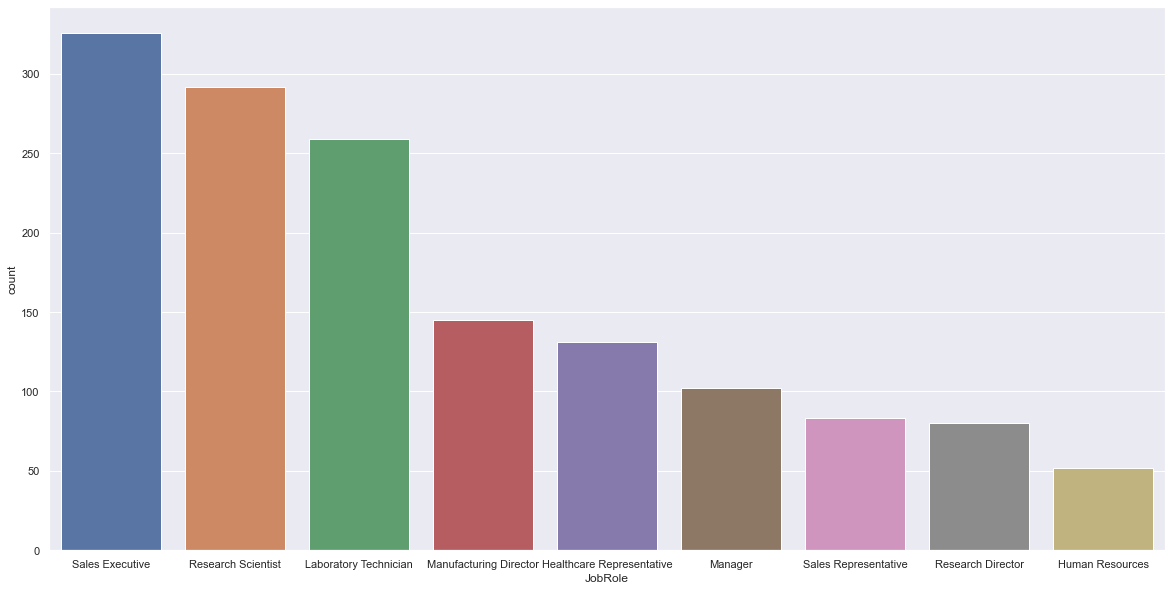

In [161]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
ax=sns.countplot(x="JobRole", data=df)

top two job role are sales executive and research scientist and total on 9 roles

'maritial status'

In [162]:
df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

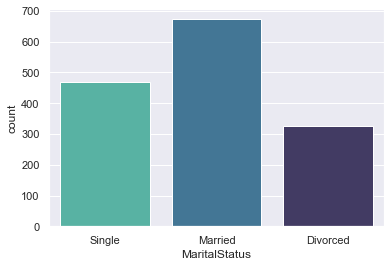

In [163]:
sns.countplot(x='MaritalStatus', data=df, palette="mako_r")
plt.show()

In [164]:
countsingle = len(df[df.MaritalStatus == 'Single'])
countmarried = len(df[df.MaritalStatus == 'Married'])
countdivorced = len(df[df.MaritalStatus == 'Divorced'])

print("Percentage of count1: {:.2f}%".format((countsingle / (len(df.MaritalStatus))*100)))
print("Percentage of count2: {:.2f}%".format((countmarried/ (len(df.MaritalStatus))*100)))
print("Percentage of count4: {:.2f}%".format((countdivorced / (len(df.MaritalStatus))*100)))


Percentage of count1: 31.97%
Percentage of count2: 45.78%
Percentage of count4: 22.24%


maximum people are married in the company

'Attrition'

In [165]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

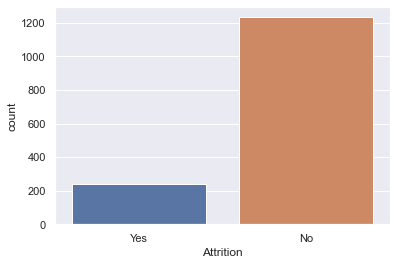

In [166]:
sns.countplot(df.Attrition)

here target variable is imbalance.

age vs attrition

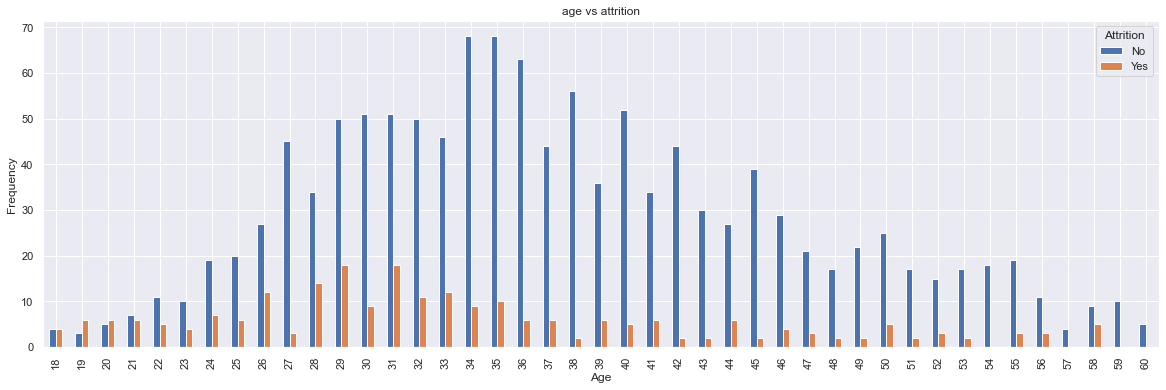

In [167]:
pd.crosstab(df.Age,df.Attrition).plot(kind="bar",figsize=(20,6))
plt.title('age vs attrition')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

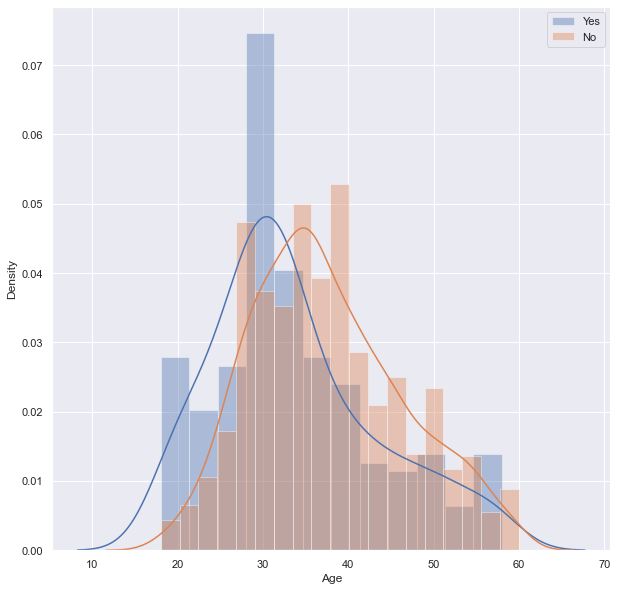

In [168]:
plt.figure(figsize=(10,10))
sns.distplot(df[df.Attrition == 'Yes']['Age'],label='Yes')
sns.distplot(df[df.Attrition == 'No']['Age'],label='No')
plt.legend()

people with less age are more likely to leave other than older

travelling vs attrition

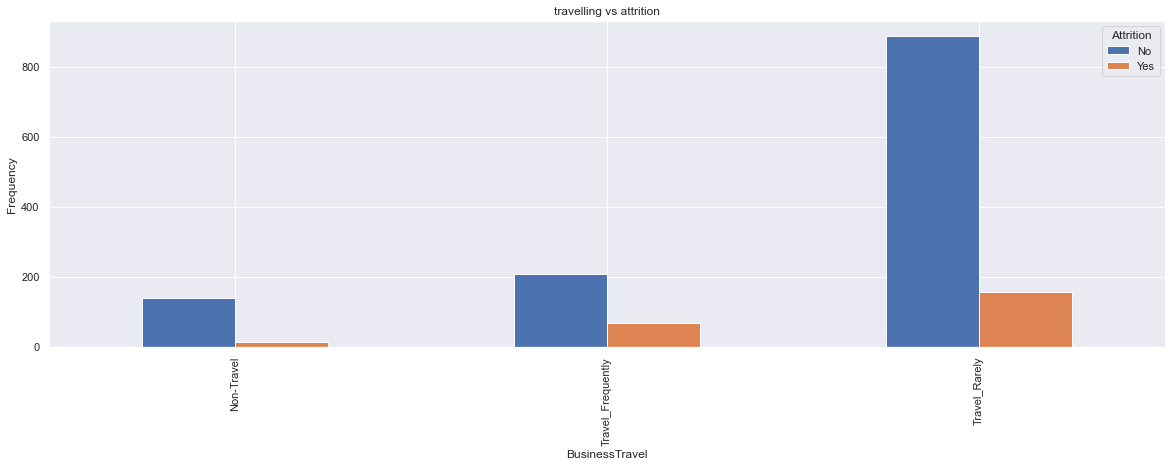

In [169]:
pd.crosstab(df.BusinessTravel,df.Attrition).plot(kind="bar",figsize=(20,6))
plt.title('travelling vs attrition')
plt.xlabel('BusinessTravel')
plt.ylabel('Frequency')
plt.show()

looks normally as people travelling rarely has high count

Education vs monthly income

<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

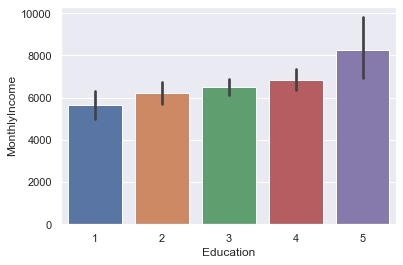

In [170]:
sns.barplot(df.Education,df.MonthlyIncome)

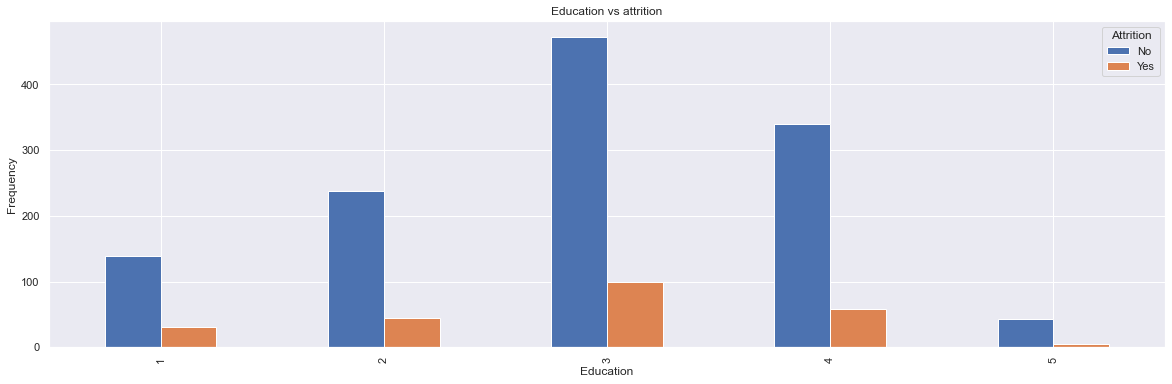

In [171]:
pd.crosstab(df.Education,df.Attrition).plot(kind="bar",figsize=(20,6))
plt.title('Education vs attrition')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

the higher the education, higher will be salary

jobrole vs salary/attrtion

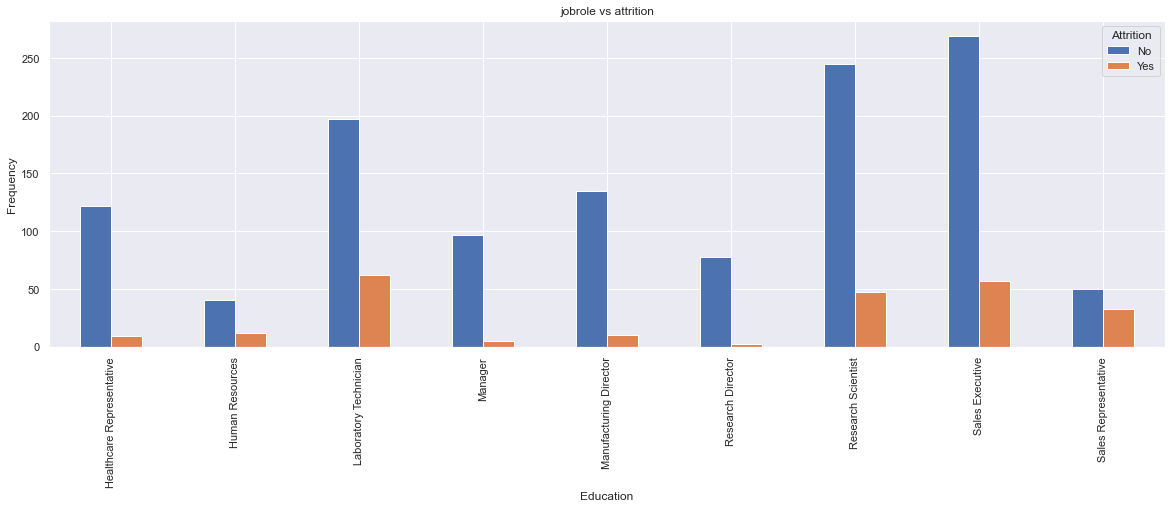

In [173]:
pd.crosstab(df.JobRole,df.Attrition).plot(kind="bar",figsize=(20,6))
plt.title('jobrole vs attrition')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

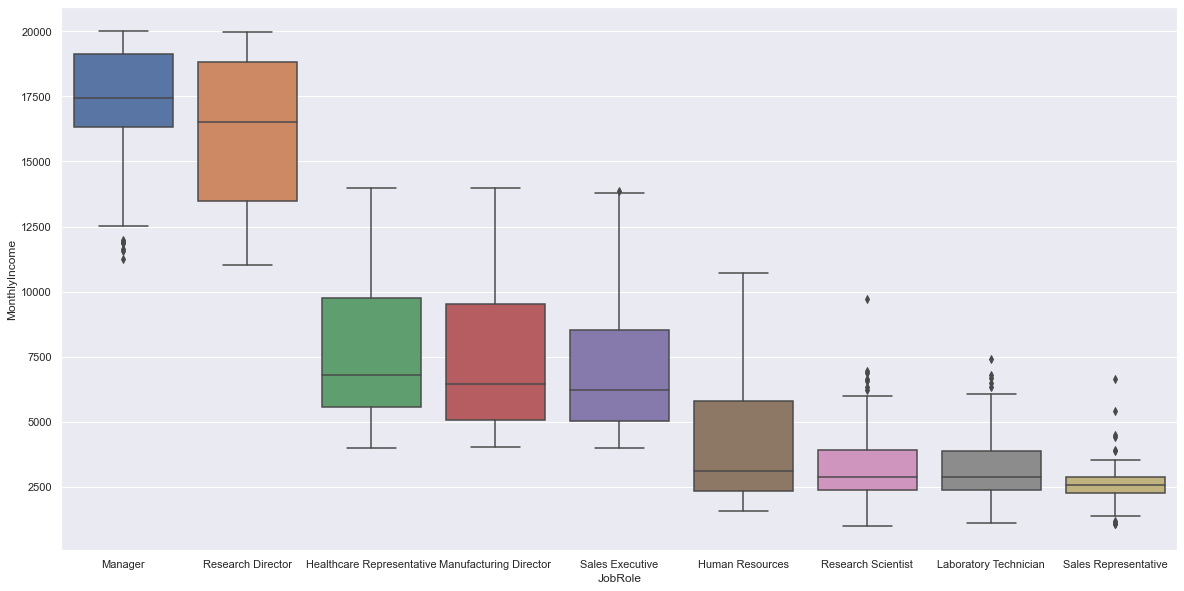

In [174]:
plt.figure(figsize=(20,10))

sns.boxplot(df.JobRole,df.MonthlyIncome,order=df.groupby('JobRole').mean().sort_values('MonthlyIncome',ascending=False)['MonthlyIncome'].index)

top two roles having highest salary are manager and research diretor

distance to home vs attrition

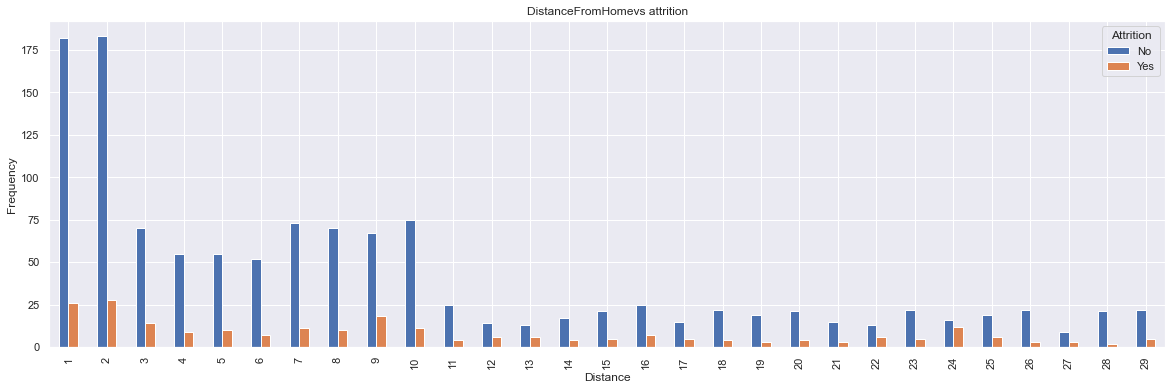

In [175]:
pd.crosstab(df.DistanceFromHome,df.Attrition).plot(kind="bar",figsize=(20,6))
plt.title('DistanceFromHomevs attrition')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

due to travel expense people are likely to leave and people who are close have less probablity to leave

total working years to montly income /attrition

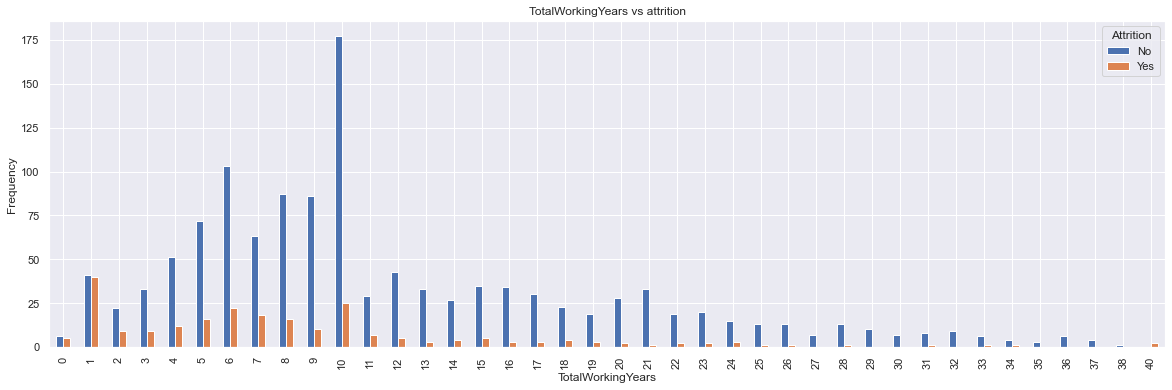

In [176]:
pd.crosstab(df.TotalWorkingYears,df.Attrition).plot(kind="bar",figsize=(20,6))
plt.title('TotalWorkingYears vs attrition')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

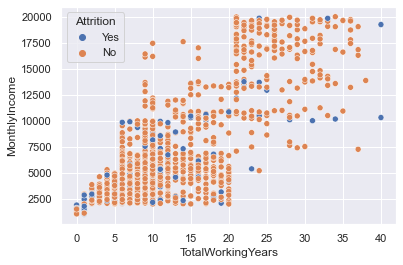

In [177]:
sns.scatterplot(df.TotalWorkingYears,df.MonthlyIncome,hue=df.Attrition)

people having less experience are more likely to leave and people having mediocre income are also leaving

In [178]:
#PRE PROCESSING THE DATA AS EDA IS COMPLETED

In [179]:
df = df.drop(['StandardHours','EmployeeNumber','EmployeeCount','Over18'],axis=1)

In [180]:
df.shape

(1470, 31)

In [181]:
# let's using IQR to address the outliers in hte dataset.

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Age                            13.00
DailyRate                     692.00
DistanceFromHome               12.00
Education                       2.00
EnvironmentSatisfaction         2.00
HourlyRate                     35.75
JobInvolvement                  1.00
JobLevel                        2.00
JobSatisfaction                 2.00
MonthlyIncome                5468.00
MonthlyRate                 12414.50
NumCompaniesWorked              3.00
PercentSalaryHike               6.00
PerformanceRating               0.00
RelationshipSatisfaction        2.00
StockOptionLevel                1.00
TotalWorkingYears               9.00
TrainingTimesLastYear           1.00
WorkLifeBalance                 1.00
YearsAtCompany                  6.00
YearsInCurrentRole              5.00
YearsSinceLastPromotion         3.00
YearsWithCurrManager            5.00
dtype: float64


In [182]:
# let's using IQR to address the outliers ==

df = df[~((df < (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)]

In [184]:
df.shape

(1206, 31)

In [185]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6


In [186]:
df.PerformanceRating.value_counts()

3    1206
Name: PerformanceRating, dtype: int64

In [187]:
# We can drop performance rating from the data as it has only 1 value
df.drop('PerformanceRating',1,inplace=True)

In [192]:
df.skew()

Age                         0.433475
DailyRate                  -0.019154
DistanceFromHome            0.972771
Education                  -0.311870
EnvironmentSatisfaction    -0.328554
HourlyRate                 -0.022233
JobInvolvement             -0.492983
JobLevel                    1.087102
JobSatisfaction            -0.340888
MonthlyIncome               1.479647
MonthlyRate                 0.006231
NumCompaniesWorked          1.014020
PercentSalaryHike           0.583541
RelationshipSatisfaction   -0.306168
StockOptionLevel            0.971111
TotalWorkingYears           1.084812
TrainingTimesLastYear       0.574283
WorkLifeBalance            -0.530803
YearsAtCompany              1.333466
YearsInCurrentRole          0.913143
YearsSinceLastPromotion     1.779690
YearsWithCurrManager        0.864407
dtype: float64

skewness is little positive but thats fine

In [195]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,13,3,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,4,Female,...,18,4,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,17,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,15,1,1,9,5,3,7,7,1,7
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,14,4,0,17,3,2,9,6,0,8


In [196]:
df.Attrition = df.Attrition.apply(lambda x:0 if x=='No' else 1)
df.Gender = df.Gender.apply(lambda x:1 if x=='Male' else 0)
df.OverTime = df.OverTime.apply(lambda x:1 if x=='Yes' else 0)


In [197]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,11,1,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,15,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,11,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,12,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,1,...,13,3,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,26,0,Travel_Rarely,1167,Sales,5,3,Other,4,0,...,18,4,0,5,2,3,4,2,0,0
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,1,...,17,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,1,...,15,1,1,9,5,3,7,7,1,7
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,1,...,14,4,0,17,3,2,9,6,0,8


In [205]:
a = pd.get_dummies(df['BusinessTravel'], prefix = "BusinessTravel")
b = pd.get_dummies(df['Department'], prefix = "Department")
c = pd.get_dummies(df['EducationField'], prefix = "EducationField")
d = pd.get_dummies(df['JobRole'], prefix = "JobRole")
e = pd.get_dummies(df['MaritalStatus'], prefix = "MaritalStatus")

frames = [df, a, b, c,d,e]
df = pd.concat(frames, axis = 1)
df.head()



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,0,0,0,0,0,1,0,0,0,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,1,0,0,0,0,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,0,0,0,0,1,0,0,0,1,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,1,0,0,0,0,0,0,0,1,0
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,1,...,1,0,0,0,0,0,0,0,0,1


In [207]:
df = df.drop(columns = ['BusinessTravel', 'Department', 'EducationField','JobRole', 'MaritalStatus'])
df.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
2,37,1,1373,2,2,4,1,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,1,0,0,0,0,0,0,0,1,0
5,32,0,1005,2,2,4,1,79,3,1,...,1,0,0,0,0,0,0,0,0,1


In [209]:
# split X and y 
X = df.drop('Attrition',1)
y = df['Attrition']

In [210]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [211]:
# check the shapes:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((844, 48), (844,), (362, 48), (362,))

In [213]:
to_scale_features = 'Age DailyRate DistanceFromHome Education EnvironmentSatisfaction HourlyRate JobInvolvement JobLevel JobSatisfaction MonthlyIncome MonthlyRate NumCompaniesWorked PercentSalaryHike RelationshipSatisfaction TotalWorkingYears TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole YearsSinceLastPromotion YearsWithCurrManager'.split()   

In [214]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('scalar',StandardScaler(),to_scale_features)],remainder='passthrough')

In [215]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [216]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((844, 48), (844,), (362, 48), (362,))

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [223]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score,auc,confusion_matrix,classification_report,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,roc_auc_score

In [224]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
    

0.7790055248618785
[[261  32]
 [ 48  21]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       293
           1       0.40      0.30      0.34        69

    accuracy                           0.78       362
   macro avg       0.62      0.60      0.61       362
weighted avg       0.76      0.78      0.77       362



In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
model=LogisticRegression()

In [228]:
model.fit(X_train,y_train)

LogisticRegression()

In [229]:
model.score(X_test,y_test)

0.8480662983425414

In [231]:
lrg=LogisticRegression()
lrg.fit(X_train,y_train)
lrg.score(X_train,y_train)
predlrg=lrg.predict(X_test)
print(accuracy_score(y_test,predlrg))
print(confusion_matrix(y_test,predlrg))
print(classification_report(y_test,predlrg))

0.8480662983425414
[[284   9]
 [ 46  23]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       293
           1       0.72      0.33      0.46        69

    accuracy                           0.85       362
   macro avg       0.79      0.65      0.68       362
weighted avg       0.83      0.85      0.82       362



In [233]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8093922651933702
[[287   6]
 [ 63   6]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       293
           1       0.50      0.09      0.15        69

    accuracy                           0.81       362
   macro avg       0.66      0.53      0.52       362
weighted avg       0.76      0.81      0.75       362



In [234]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
svc.score(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8287292817679558
[[291   2]
 [ 60   9]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       293
           1       0.82      0.13      0.23        69

    accuracy                           0.83       362
   macro avg       0.82      0.56      0.56       362
weighted avg       0.83      0.83      0.77       362



In [236]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(X_train,y_train)
    svc.score(X_train,y_train)
    predsvc=svc.predict(X_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [237]:
svmkernel('rbf')

0.8176795580110497
[[292   1]
 [ 65   4]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       293
           1       0.80      0.06      0.11        69

    accuracy                           0.82       362
   macro avg       0.81      0.53      0.50       362
weighted avg       0.81      0.82      0.75       362



In [241]:
# Predicted values
y_head_lrg = lrg.predict(X_test)
knn3 = KNeighborsClassifier(n_neighbors = 5)
knn3.fit(X_train, y_train)
y_head_knn = knn3.predict(X_test)
y_head_svc = svc.predict(X_test)
y_head_dtc = dtc.predict(X_test)

In [243]:
from sklearn.metrics import confusion_matrix

cm_lrg = confusion_matrix(y_test,y_head_lrg)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svc = confusion_matrix(y_test,y_head_svc)
cm_dtc = confusion_matrix(y_test,y_head_dtc)

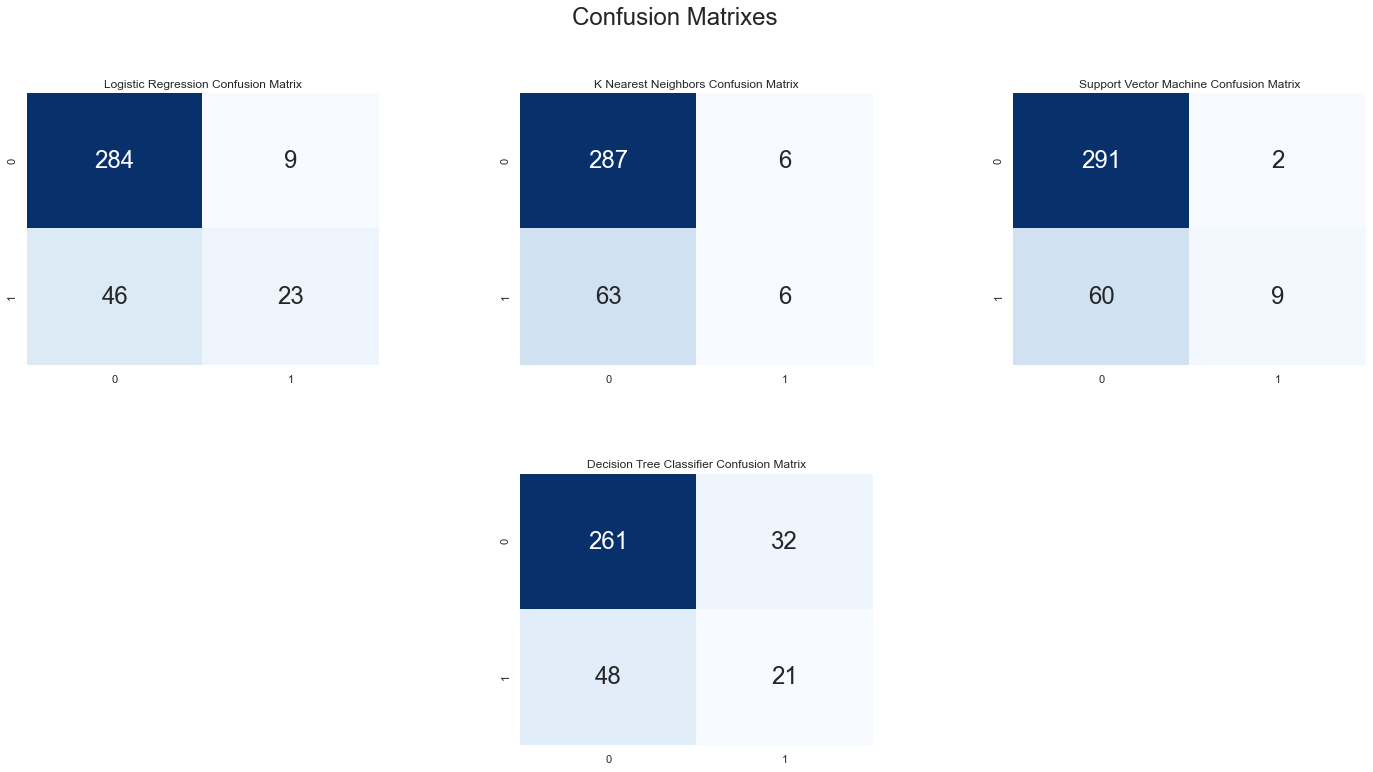

In [244]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lrg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [ ]:
def train_n_ret_scores(model):
    """
    Input: model for fitting the data.
    Output: scores on the test set
    """
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    print(classification_report(y_test,y_preds))
    

In [246]:
train_n_ret_scores(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       293
           1       0.67      0.20      0.31        69

    accuracy                           0.83       362
   macro avg       0.75      0.59      0.61       362
weighted avg       0.81      0.83      0.79       362



In [247]:
train_n_ret_scores(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       293
           1       0.63      0.25      0.35        69

    accuracy                           0.83       362
   macro avg       0.74      0.61      0.63       362
weighted avg       0.80      0.83      0.80       362



In [248]:
train_n_ret_scores(AdaBoostClassifier(RandomForestClassifier()))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       293
           1       1.00      0.06      0.11        69

    accuracy                           0.82       362
   macro avg       0.91      0.53      0.50       362
weighted avg       0.85      0.82      0.75       362



In [249]:
train_n_ret_scores(GaussianNB())

              precision    recall  f1-score   support

           0       0.93      0.37      0.52       293
           1       0.25      0.88      0.39        69

    accuracy                           0.46       362
   macro avg       0.59      0.62      0.46       362
weighted avg       0.80      0.46      0.50       362



In [250]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]
model_names = 'LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,KNeighborsClassifier,SVC,GaussianNB'.split(',')

models_df = pd.DataFrame(columns=['Model','Train_Acc','Test_Acc','Precision','Recall','F1_score','Avg_CV'])

for model,model_names in zip(models,model_names):
    
    model.fit(X_train,y_train)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    y_preds = model.predict(X_test)
    
    prec = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1= f1_score(y_test,y_preds)

    avg_cv = np.mean(cross_val_score(model,X,y,cv=KFold(n_splits=10,shuffle=True,random_state=42)))

    models_df = models_df.append({'Model':model_names,'Train_Acc':train_acc,'Test_Acc':test_acc,'Precision':prec,'Recall':recall,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)
    
models_df.set_index('Model',inplace=True)

In [251]:
models_df

,Train_Acc,Test_Acc,Precision,Recall,F1_score,Avg_CV
Model,,,,,,
LogisticRegression,0.904028,0.848066,0.718750,0.333333,0.455446,0.842562
DecisionTreeClassifier,1.000000,0.779006,0.387755,0.275362,0.322034,0.796818
RandomForestClassifier,1.000000,0.828729,0.888889,0.115942,0.205128,0.851687
GradientBoostingClassifier,0.978673,0.825967,0.636364,0.202899,0.307692,0.863271
AdaBoostClassifier,0.912322,0.828729,0.629630,0.246377,0.354167,0.874862
KNeighborsClassifier,0.874408,0.809392,0.500000,0.086957,0.148148,0.821839
SVC,0.913507,0.817680,0.800000,0.057971,0.108108,0.840902
GaussianNB,0.414692,0.464088,0.246964,0.884058,0.386076,0.722225


In [254]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(LogisticRegression()),KNeighborsClassifier(),SVC(),GaussianNB()]
model_names = 'LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,KNeighborsClassifier,SVC,GaussianNB'.split(',')

models_df_new = pd.DataFrame(columns=['Model','Train_Acc','Test_Acc','Avg_CV','Avg_CV_ROC_AUC'])

for model,model_names in zip(models,model_names):
    #print(model,model_names)
    model.fit(X_train,y_train)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    y_preds = model.predict(X_test)

    avg_cv = np.mean(cross_val_score(model,X,y,cv=KFold(n_splits=10,shuffle=True,random_state=42),scoring='accuracy'))
    
    avg_cv_roc_auc = np.mean(cross_val_score(model,X,y,cv=KFold(n_splits=10,shuffle=True,random_state=42),scoring='roc_auc'))
    #print(train_acc,test_acc,avg_cv,avg_cv_roc_auc)
    models_df_new = models_df_new.append({'Model':model_names,'Train_Acc':train_acc,'Test_Acc':test_acc,'Avg_CV':avg_cv,'Avg_CV_ROC_AUC':avg_cv_roc_auc},ignore_index=True)
    #print(models_df_new)
#models_df_new.set_index('Model',inplace=True)

In [255]:
models_df_new

,Model,Train_Acc,Test_Acc,Avg_CV,Avg_CV_ROC_AUC
0,LogisticRegression,0.904028,0.848066,0.842562,0.715340
1,DecisionTreeClassifier,1.000000,0.795580,0.794346,0.638448
2,RandomForestClassifier,1.000000,0.825967,0.852534,0.796277
3,GradientBoostingClassifier,0.978673,0.831492,0.864105,0.829356
4,AdaBoostClassifier,0.893365,0.842541,0.848388,0.793569
5,KNeighborsClassifier,0.874408,0.809392,0.821839,0.597189
6,SVC,0.913507,0.817680,0.840902,0.502928
7,GaussianNB,0.414692,0.464088,0.722225,0.763918


AdaBoost Classifier with Logistic Regression as the base model is woking great

ROC_AUC is one of the best metric to check the performance on the imbalanced dataset.

In [256]:
# best model:

best_model = AdaBoostClassifier(LogisticRegression())

best_model.fit(X_train,y_train)

y_preds = best_model.predict(X_test)

np.mean(cross_val_score(best_model,X,y,cv=KFold(n_splits=10,shuffle=True)))

0.8515633608815427

In [257]:
np.mean(cross_val_score(best_model,X,y,cv=KFold(n_splits=10,shuffle=True),scoring='roc_auc'))

0.8009453216437569

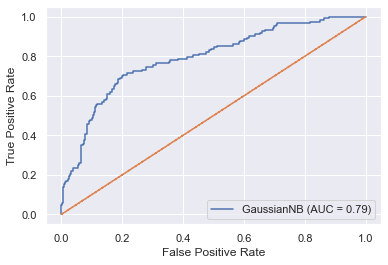

In [258]:
plot_roc_curve(model,X_train,y_train)
plt.plot(y_test,y_test,linestyle='--')

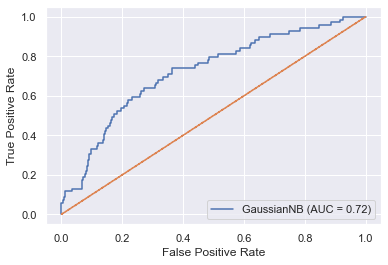

In [259]:
plot_roc_curve(model,X_test,y_test)
plt.plot(y_test,y_test,linestyle='--')

In [260]:
# Saving the bes model:
import joblib

joblib.dump(best_model,'HR.pkl')

['HR.pkl']